## Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

Чтение файлов и добавление данных в 1 датафрейм:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from os.path import join
%matplotlib inline

directory = 'babynames'
df = pd.DataFrame()

for i in range(1880, 2011):
    file = 'yob{}.txt'.format(i)
    new_df = pd.read_csv(join(directory, file), names=['name', 'sex', 'numbers', 'year'])
    new_df['year'] = i
    df = df.append(new_df)

df

,name,sex,numbers,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


Группировка данных по году и полу:

In [3]:
df2 = df.groupby(['year', 'sex'], as_index=False).sum()
df2.head()

,year,sex,numbers
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851


Визуализация общей динамики рождаемости:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115af9b70>],
      dtype=object)

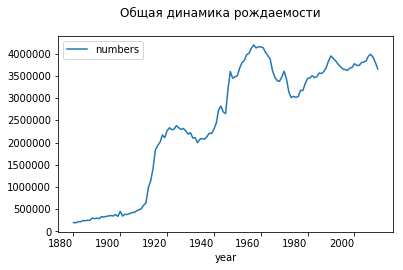

In [4]:
df2.groupby('year').sum().plot(subplots=True, rot=0, sharey=True, legend=True, title='Общая динамика рождаемости')

Графики динамики рождаемости для каждого пола:

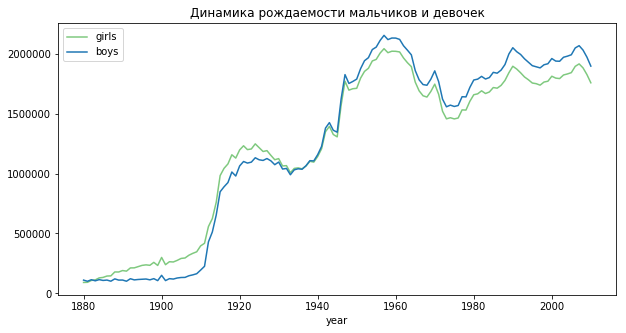

In [15]:
fig, ax = plt.subplots(1, 1)
df2[df2['sex'].values == 'F'].plot(x='year', colormap='Accent', ax=ax, figsize=(10, 5))
df2[df2['sex'].values == 'M'].plot(x='year', title='Динамика рождаемости мальчиков и девочек', ax=ax, figsize=(10, 5))
ax.legend(['girls', 'boys'])

## Найдите самые популярные имена за всю историю

In [57]:
df3 = df.groupby('name', as_index=False).sum().sort_values('numbers', ascending=False)
df3[['name', 'numbers']].head(10)

,name,numbers
34995,James,5072771
38950,John,5061897
68084,Robert,4788050
57277,Michael,4265373
55384,Mary,4119074
85076,William,4002392
19333,David,3538748
67665,Richard,2552269
39629,Joseph,2529809
14390,Charles,2347703


## Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время

Разбивка данных и создание нового датафрейма:

In [58]:
import numpy as np

years = np.linspace(1880, 2010, len(range(1880, 2011)), dtype=int)
top_names = {}
df6 = pd.DataFrame()
period = int(len(years) / 10)

for i in range(0, len(years), period):
    if years[i] != years[-1]:
        df4 = df[df['year'].isin(years[i:i + period])]
        df5 = df4.groupby(['sex', 'name'], as_index=False).sum().sort_values(['sex', 'numbers'], ascending=False)
        male = df5[df5['sex'].values == 'M'].iloc[0]['name']
        female = df5[df5['sex'].values == 'F'].iloc[0]['name']
        new_df = pd.DataFrame({'F': female, 'M': male}, index=['{}-{}'.format(years[i], years[i + period - 1])])
        df6 = df6.append(new_df)

df6

,F,M
1880-1892,Mary,John
1893-1905,Mary,John
1906-1918,Mary,John
1919-1931,Mary,Robert
1932-1944,Mary,Robert
1945-1957,Linda,James
1958-1970,Lisa,Michael
1971-1983,Jennifer,Michael
1984-1996,Jessica,Michael
1997-2009,Emily,Jacob


Динамика найденных женских имен в течении всего периода:

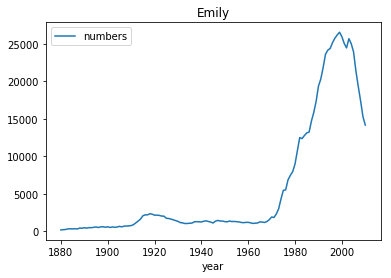

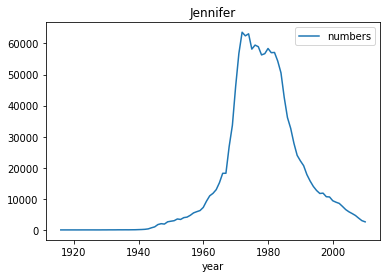

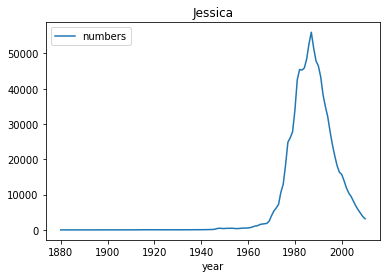

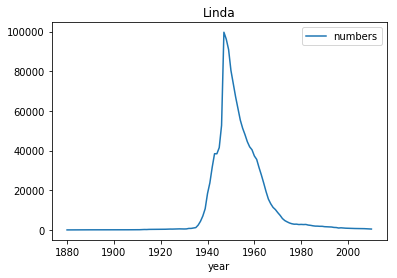

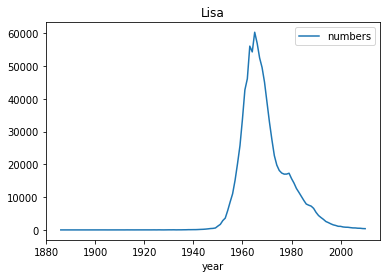

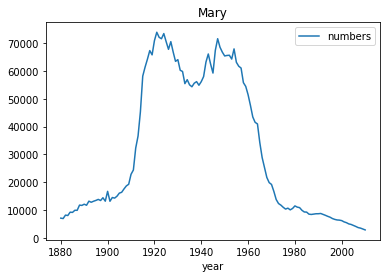

In [59]:
def show_top_names_plots(names_array, df, sex_column_name):
    for name in names_array:
        df7 = df[df['name'] == name]
        df7[df7['sex'].values == sex_column_name].plot(x='year', title=name)

show_top_names_plots(np.unique(df6['F'].values), df, 'F')

Динамика найденных мужских имен в течении всего периода:

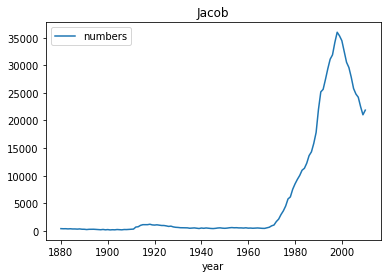

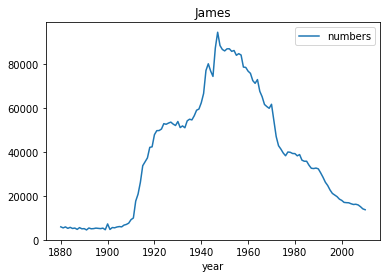

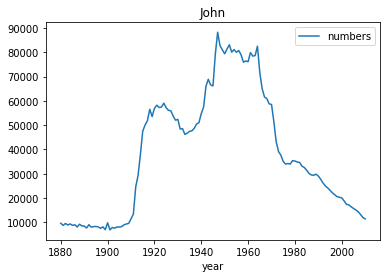

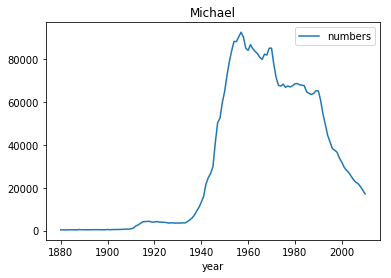

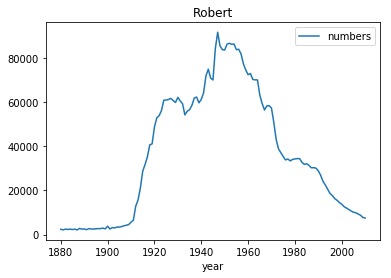

In [60]:
show_top_names_plots(np.unique(df6['M'].values), df, 'M')

## Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год)

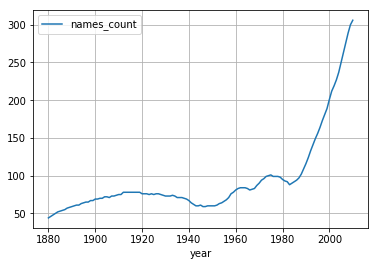

In [61]:
popular_names = df.groupby(['year', 'name'], as_index=False).sum().sort_values(['year', 'numbers'], ascending=False)
variety_of_names = pd.DataFrame()

for year in range(popular_names['year'].max(), popular_names['year'].min() - 1, -1):
    div_by_year = popular_names[popular_names['year'] == year]
    total_sum = div_by_year['numbers'].sum()
    names_count = len(div_by_year[div_by_year['numbers'].cumsum() < total_sum / 2])
    new_df = pd.DataFrame({'year': [year], 'names_count': [names_count]})
    variety_of_names = variety_of_names.append(new_df)
    
variety_of_names.sort_values('year').plot(x='year', grid=True)

## Выберите 4 года из всего промежутка и отобразите для каждого года распределение по первой букве в имени, по последней букве в имени

Распределения по первой букве:

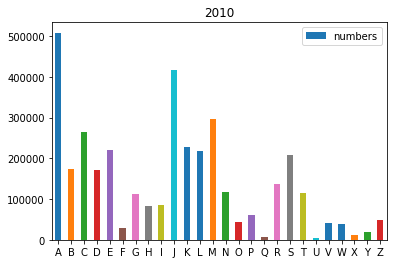

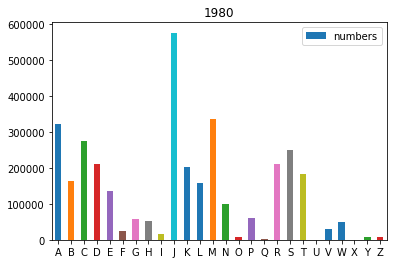

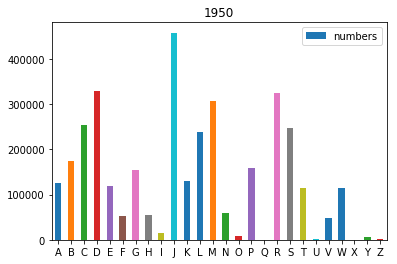

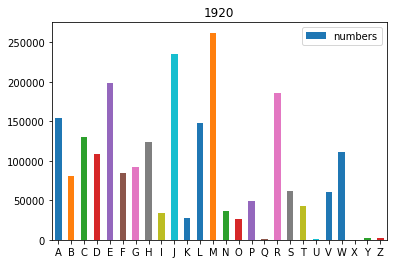

In [62]:
years = (2010, 1980, 1950, 1920)

def show_plots_by_name_letter(df, years, letter_index):
    for year in years:
        div_by_year = df[df['year'] == year]
        first_letters = div_by_year.groupby(lambda x: div_by_year['name'].loc[x][letter_index]).sum()
        first_letters['year'] = year
        first_letters.plot.bar(x=first_letters.index.values, y='numbers', rot=0, title=year)

show_plots_by_name_letter(df, years, 0)

Распределения по последней букве:

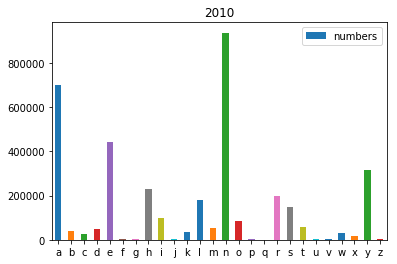

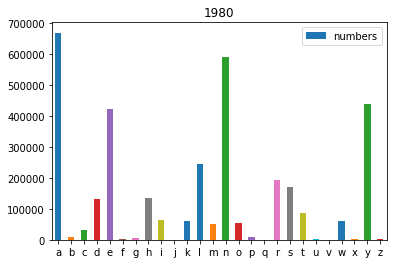

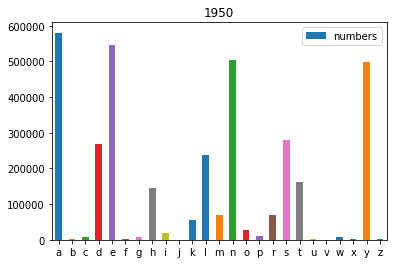

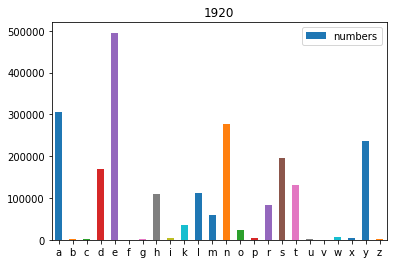

In [63]:
show_plots_by_name_letter(df, years, -1)

## Составьте список из нескольких известных людей (президенты, певцы, актеры, киногерои) и оцените их влияние на динамику имен, постройте наглядную визуализацию

Скачиваем датасет с информацией о президентах США https://www.kaggle.com/harshitagpt/us-presidents

Чтение и приведение некоторых данных к нужному виду:

In [64]:
american_presidents = pd.read_csv('us_presidents.csv')

def change_data(df, column, index, splitter=' '):
    for i, row in enumerate(df[column]):
        data = row.split(splitter)
        american_presidents.at[i, column] = data[index]

# Оставим в датах только года
change_data(american_presidents, 'start', -1, ', ')
change_data(american_presidents[american_presidents.index < 43], 'end', -1, ', ')

# Оставим в колонке president только имя
change_data(american_presidents, 'president', 0)
    
# Оставим данные в пределах нужных дат
american_presidents = american_presidents[american_presidents['start'].astype('int64').isin(range(1880, 2009))]
american_presidents.head()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
19,19,20,1881,1881,James,U.S. Representative for Ohio's 19th District...,Republican,Chester A. Arthur
20,20,21,1881,1885,Chester,20th Vice President of the United States,Republican,Office vacant
21,21,22,1885,1889,Grover,28th Governor of New York (1883–1885),Democratic,Thomas A. Hendricks
22,22,23,1889,1893,Benjamin,U.S. Senator ( Class 1 ) from Indiana (...,Republican,Levi P. Morton
23,23,24,1893,1897,Grover,22nd President of the United States (1885–1...,Democratic,Adlai Stevenson


Визуализация данных (красная пунктирная линия - даты президентского срока):

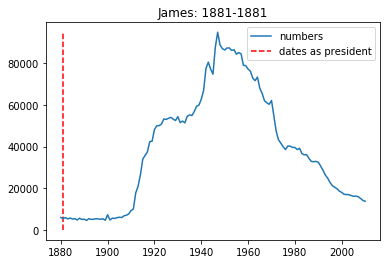

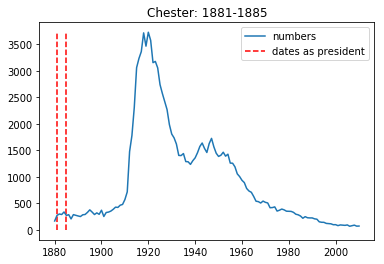

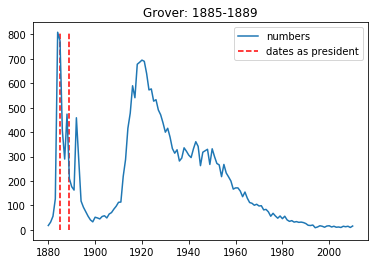

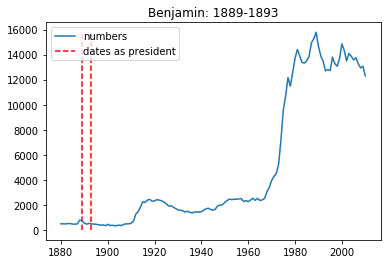

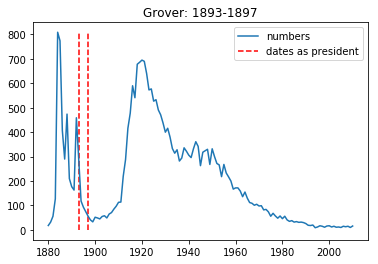

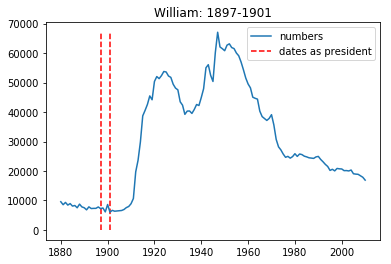

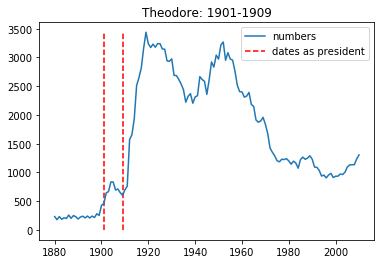

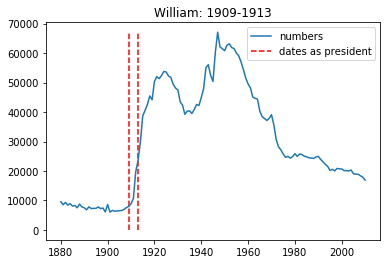

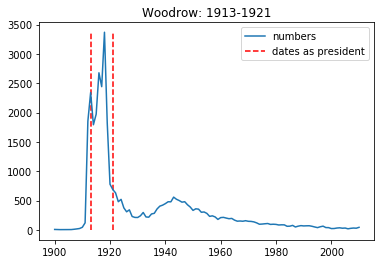

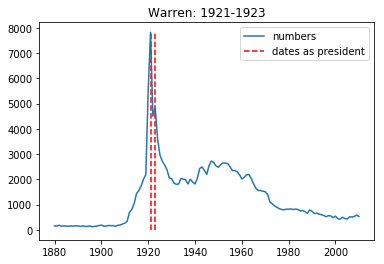

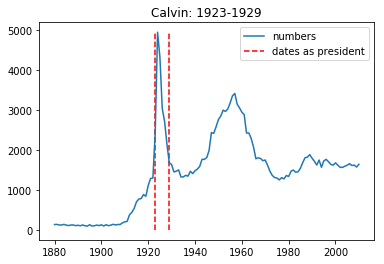

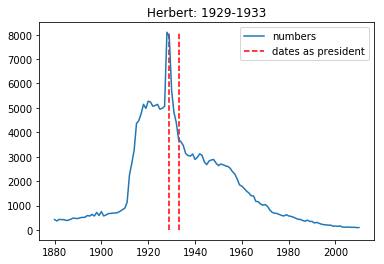

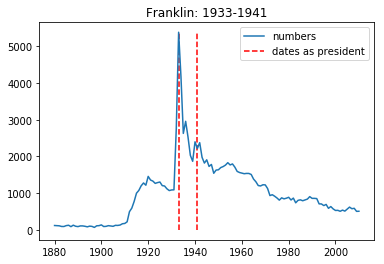

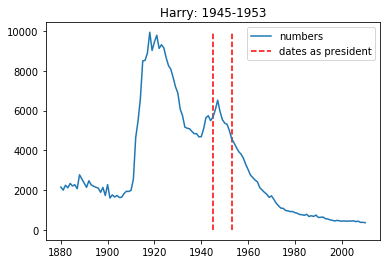

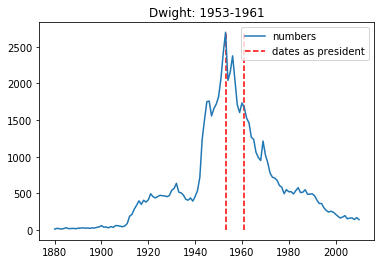

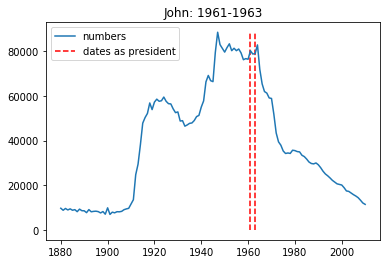

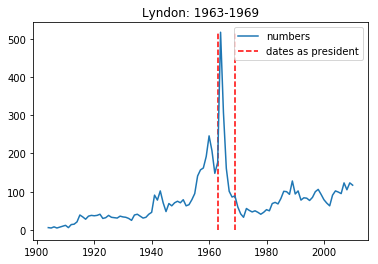

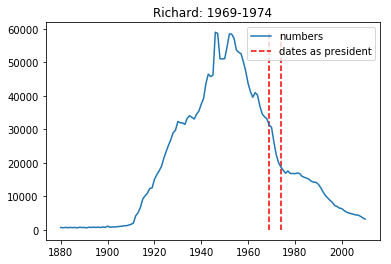

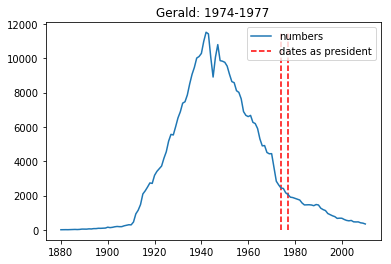

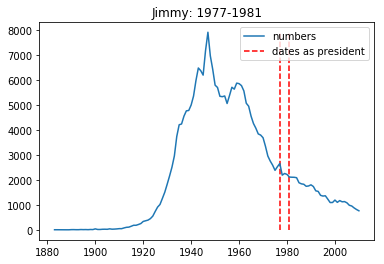

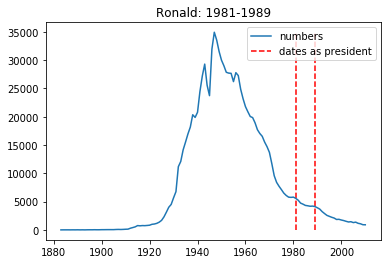

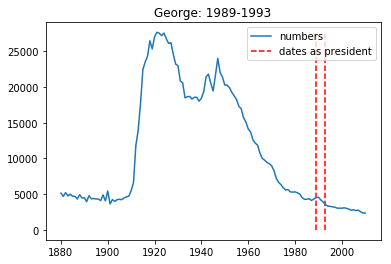

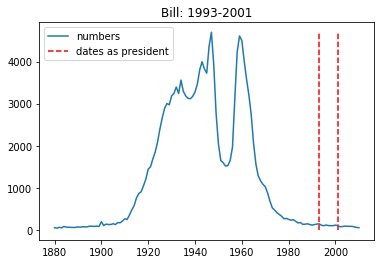

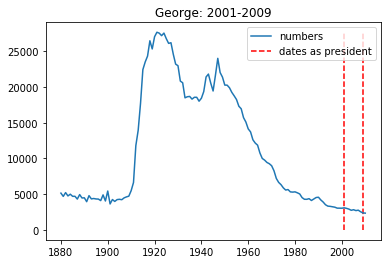

In [65]:
for i in range(len(american_presidents)):
    start = american_presidents.iat[i, 2]
    end = american_presidents.iat[i, 3]
    name = american_presidents.iat[i, 4]
    
    fr = df[df['name'] == name]
    fr = fr.groupby(['name', 'year'], as_index=False).sum()
    x = fr['year']
    y = fr['numbers']
    
    fig = plt.figure()
    plt.plot(x, y)
    plt.title('{}: {}-{}'.format(name, start, end))
    plt.vlines(int(start), 0, fr['numbers'].max(), colors='r', linestyles='dashed', label='dates as president')
    
    if start != end:
        plt.vlines(int(end), 0, fr['numbers'].max(), colors='r', linestyles='dashed')
        
    plt.legend()
    plt.show()

По некоторым графикам взаимосвязь не наблюдается.

Особое внимание стоит отметить на графики:
* Lyndon (1963-1969), Calvin (1923-1929), Woodrow (1913-1921) - именно в начале президентского срока наблюдается резкий прирост, а потом снова резкое снижение.
* Dwight (1953-1961), Franklin (1933-1941), Herbert (1929-1933), Warren (1921-1923), Grover (1893-1897), Grover (1885-1889) - тут наоборот, начался спад. Но именно резкий скачок вверх был за несколько лет до начала президентского срока. 
* William (1909-1913) - именно с начала президентского срока имя становится популярным надолго.
* Theodore (1901-1909) - небольшой прирост в начале и резкий взлет после окончания срока правления. Теодор Рузвельт был губернатором Нью-Йорка за год до становления президентом - по графику именно тогда начинается рост популярности имени.

Какие-то выводы делать рано. Данные требуют более конкретного изучения.
